# Introduction to Pandas : Part 1
-------
This tutorial is heavily based on [Pandas in 10 min](https://pandas.pydata.org/pandas-docs/stable/10min.html). The original material waas modified by adding TnSeq data as examples. 


## Get datasets to play with

In [0]:
%%bash
wget https://nekrut.github.io/BMMB554/tnseq_untreated.txt.gz
wget https://nekrut.github.io/BMMB554/ta_gc.txt

In [0]:
data_file = 'tnseq_untreated.txt.gz'

The first dataset lists coordinates of `TA` sites and counts of reads for TnSeq constructs 'blunt', 'cap', 'dual', 'erm', 'pen', and 'tuf':

In [95]:
!gunzip -c {data_file} | head

2400002	0.0	0.0	1.0	0.0	0.0	1.0	.
2400004	1.0	0.0	5.0	0.0	0.0	1.0	.
2400006	1.0	0.0	5.0	1.0	0.0	1.0	.
2400009	2.0	2.0	8.0	1.0	0.0	0.0	.
2400029	6.0	1.0	0.0	1.0	0.0	1.0	.
2400038	4.0	2.0	0.0	3.0	3.0	2.0	.
2400047	22.0	4.0	2.0	3.0	4.0	5.0	.
2400061	25.0	3.0	3.0	2.0	2.0	9.0	.
2400065	3.0	0.0	1.0	1.0	1.0	5.0	.
2400072	8.0	5.0	28.0	10.0	7.0	9.0	.


In [96]:
# Just two choices for beginning of of gene field
!gunzip -c {data_file} | cut -f 8 | cut -f 1 -d '=' | sort | uniq -c

  49898 .
 220202 ID


In [0]:
# Process tnseq_untreated.txt.gz to correctly parse gene names

import os
f = open('data.txt','w')

with os.popen('gunzip -c {}'.format(data_file)) as stream:
  for line in stream:
    if line.split( '\t' )[7].startswith( '.' ):
      f.write( '{}\t{}\n'.format( '\t'.join( line.split( '\t' )[:7] ) , 'intergenic'  ) )
    elif line.split( '\t' )[7].startswith( 'ID' ):
      f.write( '{}\t{}\n'.format( '\t'.join( line.split( '\t' )[:7] ) , line.split( '\t' )[7].split(';')[0][3:] ) )
f.close()

In [100]:
!wc -l data.txt

270100 data.txt


In [101]:
!head data.txt

2400002	0.0	0.0	1.0	0.0	0.0	1.0	intergenic
2400004	1.0	0.0	5.0	0.0	0.0	1.0	intergenic
2400006	1.0	0.0	5.0	1.0	0.0	1.0	intergenic
2400009	2.0	2.0	8.0	1.0	0.0	0.0	intergenic
2400029	6.0	1.0	0.0	1.0	0.0	1.0	intergenic
2400038	4.0	2.0	0.0	3.0	3.0	2.0	intergenic
2400047	22.0	4.0	2.0	3.0	4.0	5.0	intergenic
2400061	25.0	3.0	3.0	2.0	2.0	9.0	intergenic
2400065	3.0	0.0	1.0	1.0	1.0	5.0	intergenic
2400072	8.0	5.0	28.0	10.0	7.0	9.0	intergenic


In [102]:
!gunzip -c {data_file} | wc -l

270100


In [0]:
import pandas as pd

tnseq = pd.read_table('data.txt', header=None, names=['pos','blunt','cap','dual','erm','pen','tuf','gene'])

In [0]:
# Let's create a small subset of this dataset
df = tnseq[tnseq['blunt'] > 200]

In [156]:
df.head()

,pos,blunt,cap,dual,erm,pen,tuf,gene
469,2404930,283.0,65.0,109.0,94.0,47.0,128.0,gene2465
470,2404933,284.0,67.0,108.0,94.0,55.0,128.0,gene2465
471,2404937,353.0,79.0,115.0,122.0,80.0,173.0,gene2465
20753,511019,7399.0,2021.0,1933.0,9207.0,1860.0,3141.0,intergenic
20754,511024,7390.0,2017.0,1925.0,9168.0,1857.0,3130.0,intergenic


In [157]:
df.index

Int64Index([   469,    470,    471,  20753,  20754,  20755,  26131,  26436,
             26437,  26438,
            ...
            245491, 245492, 245493, 252032, 252850, 252851, 254003, 255351,
            260067, 267395],
           dtype='int64', length=104)

In [158]:
df.describe()

,pos,blunt,cap,dual,erm,pen,tuf
count,1.040000e+02,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,1.295009e+06,473.000000,145.307692,141.394231,428.307692,134.855769,221.884615
std,8.859577e+05,1200.109048,328.880097,319.687360,1525.561454,303.135217,510.726083
min,4.068300e+04,202.000000,27.000000,18.000000,35.000000,16.000000,37.000000
25%,5.110228e+05,217.750000,51.750000,43.750000,73.000000,49.500000,76.500000
50%,1.046223e+06,248.000000,77.000000,64.500000,116.500000,71.500000,116.500000
75%,2.105208e+06,312.750000,123.000000,108.250000,204.500000,107.000000,183.000000
max,2.726151e+06,7399.000000,2021.000000,1933.000000,9207.000000,1860.000000,3141.000000


In [0]:
df = df.sort_values(by=['pos'])

In [0]:
df = df.set_index('pos')

In [161]:
df.head()

,blunt,cap,dual,erm,pen,tuf,gene
pos,,,,,,,
40683,211.0,80.0,91.0,68.0,81.0,67.0,gene35
103869,214.0,42.0,50.0,155.0,31.0,69.0,gene90
132578,202.0,70.0,99.0,194.0,107.0,157.0,gene116
141339,348.0,136.0,140.0,362.0,128.0,253.0,intergenic
141343,419.0,185.0,214.0,421.0,179.0,380.0,intergenic


## Selection
-------
**Note**: While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, `.at`, `.iat`, `.loc` and `.iloc`.

See the indexing documentation:
 - [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing)
 - [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting via `[]`, which slices the rows.

In [162]:
df[0:3]

,blunt,cap,dual,erm,pen,tuf,gene
pos,,,,,,,
40683,211.0,80.0,91.0,68.0,81.0,67.0,gene35
103869,214.0,42.0,50.0,155.0,31.0,69.0,gene90
132578,202.0,70.0,99.0,194.0,107.0,157.0,gene116


Selecting a single column, a `series` can be done in two ways:

In [163]:
df.gene.head()

pos
40683         gene35
103869        gene90
132578       gene116
141339    intergenic
141343    intergenic
Name: gene, dtype: object

or

In [164]:
df['gene'].head()

pos
40683         gene35
103869        gene90
132578       gene116
141339    intergenic
141343    intergenic
Name: gene, dtype: object

### Selection by label
See more in [Selection by Label](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label).

For getting a cross section using a label:

In [165]:
df.loc[2404930]

blunt         283
cap            65
dual          109
erm            94
pen            47
tuf           128
gene     gene2465
Name: 2404930, dtype: object

In [166]:
df.loc[2404930,['erm','pen']]

erm    94
pen    47
Name: 2404930, dtype: object

In [167]:
df.loc[2404930:2404937,['erm','pen']]

,erm,pen
pos,,
2404930,94.0,47.0
2404933,94.0,55.0
2404937,122.0,80.0


### Selection by position
See more in [Selection by Position](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers:

In [168]:
df.iloc[3]

blunt           348
cap             136
dual            140
erm             362
pen             128
tuf             253
gene     intergenic
Name: 141339, dtype: object

By integer slices, acting similar to numpy/python:

In [169]:
df.iloc[3:5,0:2]

,blunt,cap
pos,,
141339,348.0,136.0
141343,419.0,185.0


By lists of integer position locations, similar to the numpy/python style:

In [170]:
df.iloc[[1,2,4],[0,2]]

,blunt,dual
pos,,
103869,214.0,50.0
132578,202.0,99.0
141343,419.0,214.0


For slicing rows explicitly:

In [171]:
df.iloc[100:,1:5]

,cap,dual,erm,pen
pos,,,,
2663073,141.0,61.0,137.0,85.0
2703968,57.0,51.0,70.0,51.0
2726139,107.0,542.0,155.0,84.0
2726151,111.0,545.0,156.0,89.0


For getting a value explicitly:

In [172]:
df.iloc[1,1]

42.0

For getting fast access to a scalar (equivalent to the prior method):

In [173]:
df.iat[1,1]

42.0

### Selecting based on condition (boolean indexing)

Using a single column’s values to select data:

In [174]:
df[df.gene != 'intergenic'].head()

,blunt,cap,dual,erm,pen,tuf,gene
pos,,,,,,,
40683,211.0,80.0,91.0,68.0,81.0,67.0,gene35
103869,214.0,42.0,50.0,155.0,31.0,69.0,gene90
132578,202.0,70.0,99.0,194.0,107.0,157.0,gene116
203828,287.0,45.0,35.0,72.0,84.0,223.0,gene172
203830,287.0,45.0,35.0,73.0,84.0,223.0,gene172


Selecting values from a DataFrame where a boolean condition is met:

In [175]:
df[df > 0].head()

,blunt,cap,dual,erm,pen,tuf,gene
pos,,,,,,,
40683,211.0,80.0,91.0,68.0,81.0,67.0,gene35
103869,214.0,42.0,50.0,155.0,31.0,69.0,gene90
132578,202.0,70.0,99.0,194.0,107.0,157.0,gene116
141339,348.0,136.0,140.0,362.0,128.0,253.0,intergenic
141343,419.0,185.0,214.0,421.0,179.0,380.0,intergenic


Using the [`isin()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html#pandas.Series.isin) method for filtering:

In [176]:
df.gene.unique()

array(['gene35', 'gene90', 'gene116', 'intergenic', 'gene172', 'gene176',
       'gene206', 'gene233', 'gene275', 'gene297', 'gene313', 'gene443',
       'gene528', 'gene533', 'gene673', 'gene688', 'gene929', 'gene932',
       'gene1016', 'gene1342', 'gene1364', 'gene1469', 'gene1516',
       'gene1751', 'gene1753', 'gene1833', 'gene2010', 'gene2134',
       'gene2176', 'gene2195', 'gene2209', 'gene2233', 'gene2321',
       'gene2390', 'gene2465', 'gene2664', 'gene2707', 'gene2764',
       'gene2787'], dtype=object)

In [177]:
df[df['gene'].isin(['gene2465','gene206'])]

,blunt,cap,dual,erm,pen,tuf,gene
pos,,,,,,,
242376,229.0,31.0,56.0,63.0,44.0,69.0,gene206
242378,204.0,31.0,48.0,60.0,39.0,42.0,gene206
2404930,283.0,65.0,109.0,94.0,47.0,128.0,gene2465
2404933,284.0,67.0,108.0,94.0,55.0,128.0,gene2465
2404937,353.0,79.0,115.0,122.0,80.0,173.0,gene2465


### Setting

Setting a new column automatically aligns the data by the indexes:

In [0]:
gc = pd.read_table('ta_gc.txt', header=None, names=['pos','gc'])

In [0]:
gc = gc.set_index('pos')

In [180]:
gc.head()

,gc
pos,
4,0.339286
10,0.354839
16,0.367647
42,0.372340
79,0.303922


In [0]:
df['gc'] = gc

In [182]:
df.head()

,blunt,cap,dual,erm,pen,tuf,gene,gc
pos,,,,,,,,
40683,211.0,80.0,91.0,68.0,81.0,67.0,gene35,0.264706
103869,214.0,42.0,50.0,155.0,31.0,69.0,gene90,0.264706
132578,202.0,70.0,99.0,194.0,107.0,157.0,gene116,0.274510
141339,348.0,136.0,140.0,362.0,128.0,253.0,intergenic,0.333333
141343,419.0,185.0,214.0,421.0,179.0,380.0,intergenic,0.323529


Setting values by label:

In [0]:
df.at[2,'erm'] = 0

In [184]:
df.loc[2]

blunt    NaN
cap      NaN
dual     NaN
erm        0
pen      NaN
tuf      NaN
gene     NaN
gc       NaN
Name: 2, dtype: object

In [0]:
df = df.sort_index()

In [189]:
df.head()

,blunt,cap,dual,erm,pen,tuf,gene,gc
pos,,,,,,,,
2,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
40683,211.0,80.0,91.0,68.0,81.0,67.0,gene35,0.264706
103869,214.0,42.0,50.0,155.0,31.0,69.0,gene90,0.264706
132578,202.0,70.0,99.0,194.0,107.0,157.0,gene116,0.274510
141339,348.0,136.0,140.0,362.0,128.0,253.0,intergenic,0.333333


## Missing data
-------
pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data).

To drop any rows that have missing data:

In [194]:
df.dropna(how='any').head()

,blunt,cap,dual,erm,pen,tuf,gene,gc
pos,,,,,,,,
40683,211.0,80.0,91.0,68.0,81.0,67.0,gene35,0.264706
103869,214.0,42.0,50.0,155.0,31.0,69.0,gene90,0.264706
132578,202.0,70.0,99.0,194.0,107.0,157.0,gene116,0.274510
141339,348.0,136.0,140.0,362.0,128.0,253.0,intergenic,0.333333
141343,419.0,185.0,214.0,421.0,179.0,380.0,intergenic,0.323529


Filling missing data

In [199]:
df.fillna(value='0').head()

,blunt,cap,dual,erm,pen,tuf,gene,gc
pos,,,,,,,,
2,0,0,0,0.0,0,0,0,0
40683,211,80,91,68.0,81,67,gene35,0.264706
103869,214,42,50,155.0,31,69,gene90,0.264706
132578,202,70,99,194.0,107,157,gene116,0.27451
141339,348,136,140,362.0,128,253,intergenic,0.333333


In [202]:
df.isna().head()

,blunt,cap,dual,erm,pen,tuf,gene,gc
pos,,,,,,,,
2,True,True,True,False,True,True,True,True
40683,False,False,False,False,False,False,False,False
103869,False,False,False,False,False,False,False,False
132578,False,False,False,False,False,False,False,False
141339,False,False,False,False,False,False,False,False


## Operations
-------
See the [Basic section on Binary Ops](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop).

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic:

In [204]:
df.mean()

blunt    473.000000
cap      145.307692
dual     141.394231
erm      424.228571
pen      134.855769
tuf      221.884615
gc         0.316365
dtype: float64

Same operation on the other axis:

In [206]:
df.mean(1).head()

pos
2           0.000000
40683      85.466387
103869     80.180672
132578    118.467787
141339    195.333333
dtype: float64

### Apply
Apply functions to the data:

In [211]:
df.head()

,blunt,cap,dual,erm,pen,tuf,gene,gc
pos,,,,,,,,
2,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
40683,211.0,80.0,91.0,68.0,81.0,67.0,gene35,0.264706
103869,214.0,42.0,50.0,155.0,31.0,69.0,gene90,0.264706
132578,202.0,70.0,99.0,194.0,107.0,157.0,gene116,0.274510
141339,348.0,136.0,140.0,362.0,128.0,253.0,intergenic,0.333333


In [215]:
import numpy as np
df.loc[:,'blunt':'tuf'].apply(np.cumsum).head()

,blunt,cap,dual,erm,pen,tuf
pos,,,,,,
2,NaN,NaN,NaN,0.0,NaN,NaN
40683,211.0,80.0,91.0,68.0,81.0,67.0
103869,425.0,122.0,141.0,223.0,112.0,136.0
132578,627.0,192.0,240.0,417.0,219.0,293.0
141339,975.0,328.0,380.0,779.0,347.0,546.0


### Hostogramming
See more at [Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization):

In [217]:
df['gene'].value_counts()

intergenic    30
gene2134       7
gene929        5
gene2010       5
gene176        4
gene1016       3
gene172        3
gene1342       3
gene533        3
gene2465       3
gene2390       3
gene2233       2
gene1469       2
gene673        2
gene2195       2
gene2787       2
gene206        2
gene1753       2
gene90         1
gene2209       1
gene1364       1
gene688        1
gene313        1
gene116        1
gene2176       1
gene35         1
gene1516       1
gene528        1
gene2707       1
gene443        1
gene2764       1
gene1751       1
gene297        1
gene275        1
gene233        1
gene2321       1
gene2664       1
gene932        1
gene1833       1
Name: gene, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4880c2240>,
      dtype=object)

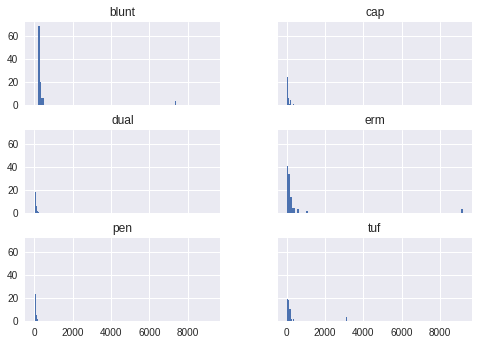

In [226]:
df.loc[:,'blunt':'tuf'].hist(bins=100, sharex=True, sharey=True)

### String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods):

In [230]:
df['gene'].str.upper().head()

pos
2                NaN
40683         GENE35
103869        GENE90
132578       GENE116
141339    INTERGENIC
Name: gene, dtype: object

In the next lecture we will learn how to process data in a number of interesting ways